In [3]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from prep_data import *
from prep_xls import *
import locale
from plot import *
from plotly.subplots import make_subplots

import json
# locale.setlocale(locale.LC_TIME, 'tr_TR.UTF8')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
city_code_map = {
    0: "ÜLKE",
    1: "ADANA",
    2: "ADIYAMAN",
    3: "AFYONKARAHİSAR",
    4: "AĞRI",
    5: "AMASYA",
    6: "ANKARA",
    7: "ANTALYA",
    8: "ARTVİN",
    9: "AYDIN",
    10: "BALIKESİR",
    11: "BİLECİK",
    12: "BİNGÖL",
    13: "BİTLİS",
    14: "BOLU",
    15: "BURDUR",
    16: "BURSA",
    17: "ÇANAKKALE",
    18: "ÇANKIRI",
    19: "ÇORUM",
    20: "DENİZLİ",
    21: "DİYARBAKIR",
    22: "EDİRNE",
    23: "ELAZIĞ",
    24: "ERZİNCAN",
    25: "ERZURUM",
    26: "ESKİŞEHİR",
    27: "GAZİANTEP",
    28: "GİRESUN",
    29: "GÜMÜŞHANE",
    30: "HAKKARİ",
    31: "HATAY",
    32: "ISPARTA",
    33: "MERSİN",
    34: "İSTANBUL",
    35: "İZMİR",
    36: "KARS",
    37: "KASTAMONU",
    38: "KAYSERİ",
    39: "KIRKLARELİ",
    40: "KIRŞEHİR",
    41: "KOCAELİ",
    42: "KONYA",
    43: "KÜTAHYA",
    44: "MALATYA",
    45: "MANİSA",
    46: "KAHRAMANMARAŞ",
    47: "MARDİN",
    48: "MUĞLA",
    49: "MUŞ",
    50: "NEVŞEHİR",
    51: "NİĞDE",
    52: "ORDU",
    53: "RİZE",
    54: "SAKARYA",
    55: "SAMSUN",
    56: "SİİRT",
    57: "SİNOP",
    58: "SİVAS",
    59: "TEKİRDAĞ",
    60: "TOKAT",
    61: "TRABZON",
    62: "TUNCELİ",
    63: "ŞANLIURFA",
    64: "UŞAK",
    65: "VAN",
    66: "YOZGAT",
    67: "ZONGULDAK",
    68: "AKSARAY",
    69: "BAYBURT",
    70: "KARAMAN",
    71: "KIRIKKALE",
    72: "BATMAN",
    73: "ŞIRNAK",
    74: "BARTIN",
    75: "ARDAHAN",
    76: "IĞDIR",
    77: "YALOVA",
    78: "KARABÜK",
    79: "KİLİS",
    80: "OSMANİYE",
    81: "DÜZCE",
    99: "Diğer iller - Other Provinces",
}


In [ ]:
sales_cities()
sales_cities_foreigners()
population()
population_marital()
population_origin_city()
population_trend()
election()

In [4]:
df1=sales_cities_df()
df2=sales_cities_foreigners_df()
df3=population_df()

df4=population_marital_df()
df_origin_city=population_origin_city_df()
df_trend=population_trend_df()
df_election=election_df()

In [5]:
df_origin_city=population_origin_city_df()
df_never_married, df_married, df_divorced, df_widowed = df4


In [ ]:
df_election[(df_election["il kayit no"]==1)].sum()[7:-2]

# Migration to Seaborn

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the style and color palette for Seaborn
sns.set(style="whitegrid")
sns.set_palette("Set3")

font_family = "Verdana"
label_font_size = 25
line_width = 5
marker_size = 12
color_palette = sns.color_palette("Set3")

def population_mah_plot(
    df_p, city_code=0, town_code=0, quarter_code=0, width=16, height=8
):
    labels = ["Erkek", "Kadın"]
    title = ""
    values1 = None

    if city_code == 0 and town_code == 0 and quarter_code == 0:
        title = "Bütün Ülke"
        values1 = df_p[["erkek", "kadin"]].sum().to_list()

    elif city_code != 0 and (town_code == 0 and quarter_code == 0):
        city_name = (
            df_p[df_p["il kayit no"] == city_code]["il adi"].iloc[0].capitalize()
        )
        title = f"{city_name}"

    elif city_code != 0 and (town_code != 0 and quarter_code == 0):
        city_name = (
            df_p[df_p["il kayit no"] == city_code]["il adi"].iloc[0].capitalize()
        )
        town_name = (
            df_p[df_p["ilçe kayit no"] == town_code]["ilçe adi"].iloc[0].capitalize()
        )
        title = f"{city_name}, {town_name}"
        values1 = df_p[
            (df_p["il kayit no"] == city_code) & (df_p["ilçe kayit no"] == town_code)
        ]
        values1 = values1[["erkek", "kadin"]].sum().to_list()

    elif city_code != 0 and (town_code != 0 and quarter_code != 0):
        city_name = (
            df_p[df_p["il kayit no"] == city_code]["il adi"].iloc[0].capitalize()
        )
        town_name = (
            df_p[df_p["ilçe kayit no"] == town_code]["ilçe adi"].iloc[0].capitalize()
        )
        quarter_name = (
            df_p[df_p["mahalle kayit no"] == quarter_code]["mahalle adi"]
            .iloc[0]
            .capitalize()
        )
        title = f"{city_name}, {town_name}, {quarter_name} Mh."
        values1 = df_p[
            (df_p["il kayit no"] == city_code)
            & (df_p["ilçe kayit no"] == town_code)
            & (df_p["mahalle kayit no"] == quarter_code)
        ]
        values1 = values1[["erkek", "kadin"]].sum().to_list()

    if values1:
        fig, ax = plt.subplots(figsize=(width, height))
        ax.pie(
            values1,
            labels=labels,
            colors=["skyblue", "salmon"],
            autopct="%1.1f%%",
            textprops={"fontsize": 12, "fontweight": "bold"},
        )
        ax.set_title(f"Cinsiyet Dağılımları: {title}", fontsize=20, fontweight="bold")
        plt.show()
    else:
        print("Please enter either: Only city name, City name and Town name, or all three")

def population_marital_plot(
    df_married,
    df_never_married,
    df_divorced,
    df_widowed,
    city_code,
    height=6,
    width=None,
):
    values1 = [df_married.iloc[city_code, 1], df_married.iloc[city_code, 2]]
    values2 = [
        df_never_married.iloc[city_code, 1]
        + df_divorced.iloc[city_code, 1]
        + df_widowed.iloc[city_code, 1],
        df_never_married.iloc[city_code, 2]
        + df_divorced.iloc[city_code, 2]
        + df_widowed.iloc[city_code, 2],
    ]
    labels = ["Erkek", "Kadın"]
    labels_2 = ["Evli", "Bekar"]
    colors = ["skyblue", "salmon"]

    fig, axs = plt.subplots(1, 3, figsize=(20, height))

    axs[0].pie(
        [sum(values1), sum(values2)],
        labels=labels_2,
        colors=colors,
        autopct="%1.1f%%",
        startangle=140,
        textprops={"fontsize": 16, "fontweight": "bold"},
    )
    axs[0].set_title("Evli-Bekar Oranı", fontsize=20, fontweight="bold")

    axs[1].pie(
        values1,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=140,
        textprops={"fontsize": 16, "fontweight": "bold"},
    )
    axs[1].set_title("Evli", fontsize=20, fontweight="bold")

    axs[2].pie(
        values2,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=140,
        textprops={"fontsize": 16, "fontweight": "bold"},
    )
    axs[2].set_title("Bekar", fontsize=20, fontweight="bold")

    fig.suptitle(
        f"Evlilik Durumuna Göre Nüfus: {city_code}", fontsize=25, fontweight="bold"
    )
    plt.show()

def population_origin_city_plot(df_origin_city, city_code=1, height=8, width=16):
    labels = [
        city_code_map.get(i).capitalize()
        for i in df_origin_city.columns[1:]
        if i != city_code
    ]
    values = df_origin_city.loc[city_code][1:]

    threshold = 0.01 * sum(values)
    labels_grouped = []
    values_grouped = []
    other_value = 0

    for label, value in zip(labels, values):
        if value < threshold:
            other_value += value
        else:
            labels_grouped.append(label)
            values_grouped.append(value)

    if other_value > 0:
        labels_grouped.append("Diğer")
        values_grouped.append(other_value)

    sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
    values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)

    fig, ax = plt.subplots(figsize=(width, height))
    ax.pie(
        values_grouped_sorted,
        labels=labels_grouped_sorted,
        colors=color_palette,
        autopct="%1.1f%%",
        # startangle=140,
        textprops={"fontsize": 12,},
    )
    ax.set_title(
        f"İkamet Edilen İle göre Nüfus Kütüğüne Kayıtlı Olunan İl: {city_code_map.get(city_code).capitalize()}",
        fontsize=20,
        fontweight="bold",
    )
    plt.show()

def population_trend_plot(df_trend, city_code=1, height=8, width=None):
    df_filtered = df_trend[df_trend["il kayit no"] == city_code]
    colors = ["lightgreen" if x > 0 else "tomato" for x in df_filtered["artis"]]

    fig, ax = plt.subplots(figsize=(16, height))
    sns.barplot(
        x="ilçe original",
        y="artis",
        data=df_filtered,
        palette=colors,
        ax=ax,
    )
    ax.set_title(
        f"Nüfus Değişimi: {city_code_map.get(city_code).capitalize()}",
        fontsize=20,
        fontweight="bold",
    )
    ax.set_xlabel("İlçe", fontsize=12, fontweight="bold", )
    plt.xticks(rotation=45, ha='right')
    ax.set_ylabel("Değişim (%)", fontsize=12, fontweight="bold")
    plt.show()

def population_election_plot(
    df_election: pd.DataFrame,
    city_code: int = 1,
    district_code=None,
    height=8,
    width=None,
):
    if district_code is None:
        selected_df = df_election[(df_election["il kayit no"] == city_code)].sum()[7:-2]
        labels = selected_df.index.to_list()
        values = selected_df.to_list()
        title_text = f"Seçim: {city_code_map.get(city_code).capitalize()}"
    else:
        selected_df = df_election[
            (df_election["il kayit no"] == city_code)
            & (df_election["ilçe kayit no"] == district_code)
        ]
        labels = selected_df.columns[7:-2].to_list()
        values = selected_df[selected_df.columns[7:-2].to_list()].iloc[0]
        title_text = f"Seçim: {city_code_map.get(city_code).capitalize()}, {selected_df.iloc[0, 2]}"

    threshold = 0.01 * sum(values)
    labels_grouped = []
    values_grouped = []
    other_value = 0

    for label, value in zip(labels, values):
        if value < threshold:
            other_value += value
        else:
            labels_grouped.append(label)
            values_grouped.append(value)

    if other_value > 0:
        labels_grouped.append("Diğer")
        values_grouped.append(other_value)

        
    sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
    values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)

    fig, ax = plt.subplots(figsize=(10, height))
    ax.pie(
        values_grouped_sorted,
        labels=labels_grouped_sorted,
        colors=color_palette,
        # autopct="%1.1f%%",
        # startangle=140,
        textprops={"fontsize": 12, "family": font_family},

    )
    ax.set_title(title_text, fontsize=20, fontweight="bold")
    plt.legend(labels=labels_grouped_sorted, title="Siyasi Parti")
    plt.show()


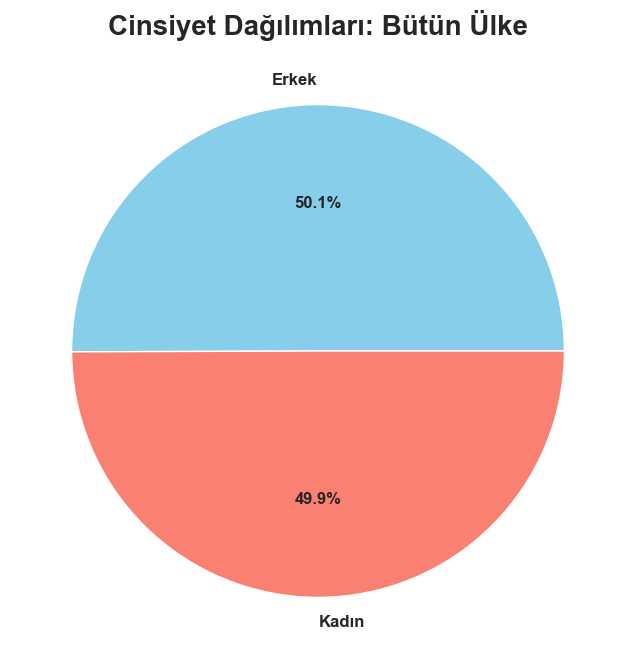

In [38]:
population_mah_plot(df3)

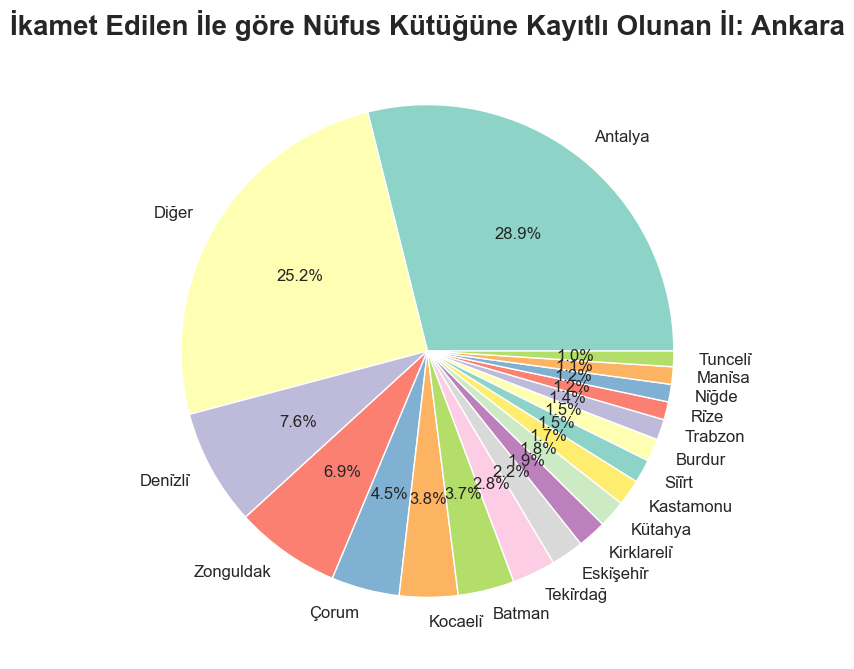

In [26]:
population_origin_city_plot(df_origin_city, city_code=6, width=20)

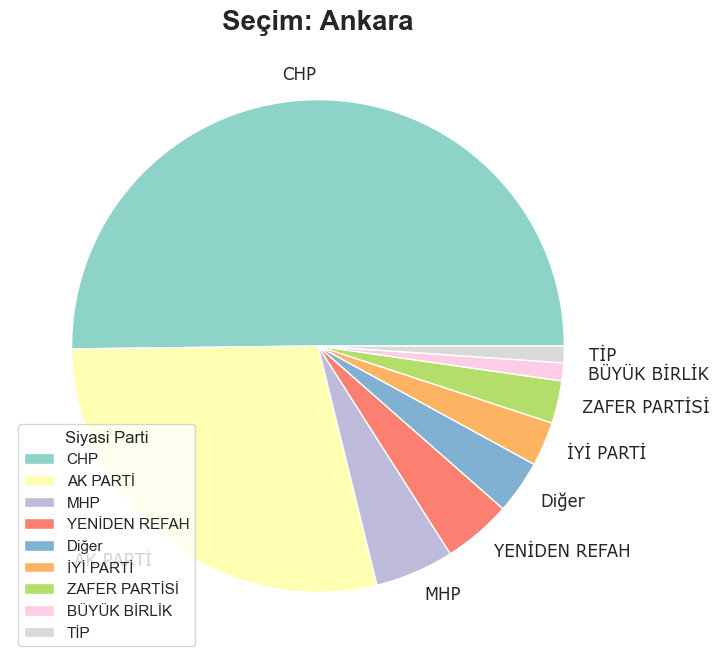

In [36]:
population_election_plot(df_election, city_code=6)

C:\Users\Zaker\AppData\Local\Temp\ipykernel_16412\2813218156.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


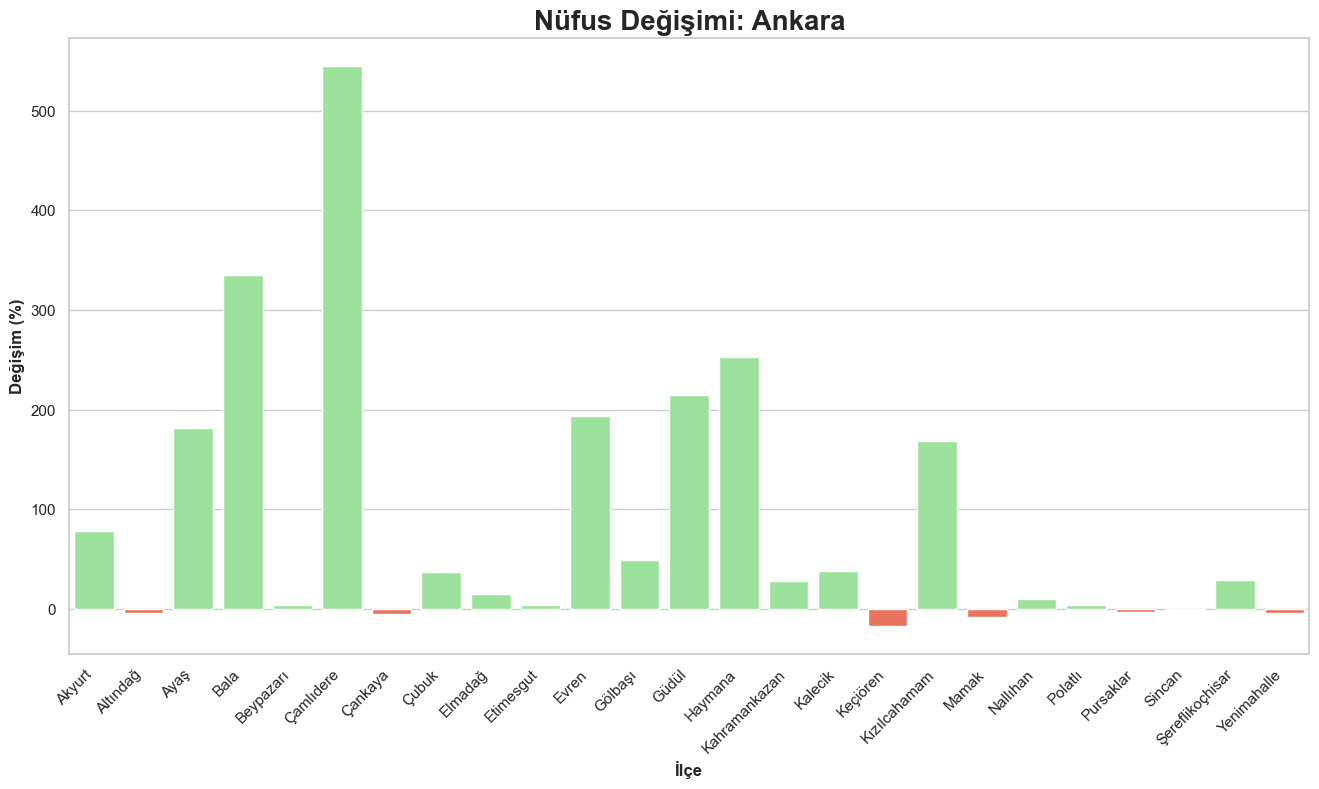

In [43]:
population_trend_plot(df_trend, city_code=6)

# New Data Viz

## Elections

In [ ]:
df_election.head()

In [ ]:


# Only City
city_code = 6
selected_df = df_election[(df_election["il kayit no"]==city_code)].sum()[7:-2]
labels = selected_df.index.to_list()
values = selected_df.to_list()

# Group smaller categories into "Other"
threshold = 0.005 * sum(values)
labels_grouped = []
values_grouped = []
other_value = 0

for label, value in zip(labels, values):
    if value < threshold:
        other_value += value
    else:
        labels_grouped.append(label)
        values_grouped.append(value)

if other_value > 0:
    labels_grouped.append('Diğer')
    values_grouped.append(other_value)
    
sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)




fig = go.Figure(
    data=[
        go.Bar(
            name="",
            x=labels_grouped_sorted,
            y=values_grouped_sorted,
            text=values_grouped_sorted,
            texttemplate="%{text:,}",
            textposition='auto',
            marker=dict(color=px.colors.qualitative.Set3),
            hovertemplate="%{label}: %{value}",

        )
    ]
)

# Update layout for the bar chart
fig.update_layout(
    title_text=f"Seçim: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
    title_x=0.5,
    height=800,
    margin=dict(t=100, b=200, l=100, r=100),
    title_xanchor="center",
    xaxis_title="Parti",
    yaxis_title="",
    xaxis=dict(tickangle=-45),
)

fig.update_layout(design)
fig.show()


In [ ]:
# City and Province
city_code = 1
province_code = 1
selected_df = df_election[(df_election["il kayit no"]==city_code) & (df_election["ilçe kayit no"]==province_code)]
selected_df

In [ ]:
selected_df.columns[4:7]


In [ ]:

import plotly.express as px

labels = selected_df.columns[7:-2].to_list()
values = selected_df[selected_df.columns[7:-2].to_list()].iloc[0]


# Group smaller categories into "Other"
threshold = 0.01 * sum(values)
labels_grouped = []
values_grouped = []
other_value = 0

for label, value in zip(labels, values):
    if value < threshold:
        other_value += value
    else:
        labels_grouped.append(label)
        values_grouped.append(value)

if other_value > 0:
    labels_grouped.append('Diğer')
    values_grouped.append(other_value)
    
sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)

# fig = px.bar(x=labels_grouped, y=values_grouped, 
#             #  color_discrete_map={"CHP": "red", "Ak Parti": "gold"},
#             color_discrete_sequence=px.colors.qualitative.Pastel,
#             labels={"": "Parti", "y": "Oran (%)"},
#             title=f"Seçim: {city_code_map.get(city_code, 'Şehir Bulunamadı').capitalize()}, {selected_df.iloc[0, 2]}")

# fig.update_layout(design)

# fig.show()



fig = go.Figure(
    data=[
        go.Bar(
            name="",
            x=labels_grouped_sorted,
            y=values_grouped_sorted,
            text=values_grouped_sorted,
            texttemplate="%{text:,}",
            textposition='auto',
            marker=dict(color=px.colors.qualitative.Set3),
            hovertemplate="%{label}: %{value}",

        )
    ]
)

# Update layout for the bar chart
fig.update_layout(
    title_text=f"Seçim: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}, {selected_df.iloc[0, 2]}",
    title_x=0.5,
    height=800,
    margin=dict(t=100, b=200, l=100, r=100),
    title_xanchor="center",
    xaxis_title="Parti",
    yaxis_title="",
    xaxis=dict(tickangle=-45),
)

fig.update_layout(design)
fig.show()

In [ ]:
population_elections_plot(df_election, city_code=1, province_code=1).show()

In [ ]:
def population_elections_plot(df_election: pd.DataFrame, city_code: int = 1, province_code=None, height=600, width=None):
    # Only City
    if province_code == None:
        selected_df = df_election[(df_election["il kayit no"]==city_code)].sum()[7:-2]
        labels = selected_df.index.to_list()
        values = selected_df.to_list()
        title_text=f"Seçim: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}"

    # City and Province
    else:
        selected_df = df_election[(df_election["il kayit no"]==city_code) & (df_election["ilçe kayit no"]==province_code)]
        labels = selected_df.columns[7:-2].to_list()
        values = selected_df[selected_df.columns[7:-2].to_list()].iloc[0]
        title_text=f"Seçim: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}, {selected_df.iloc[0, 2]}"



    # Group smaller categories into "Other"
    threshold = 0.005 * sum(values)
    labels_grouped = []
    values_grouped = []
    other_value = 0

    for label, value in zip(labels, values):
        if value < threshold:
            other_value += value
        else:
            labels_grouped.append(label)
            values_grouped.append(value)

    if other_value > 0:
        labels_grouped.append('Diğer')
        values_grouped.append(other_value)
        
    sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
    values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)

    fig = go.Figure(
        data=[
            go.Bar(
                name="",
                x=labels_grouped_sorted,
                y=values_grouped_sorted,
                text=values_grouped_sorted,
                texttemplate="%{text:,}",
                textposition='auto',
                marker=dict(color=px.colors.qualitative.Set3),
                hovertemplate="%{label}: %{value}",

            )
        ]
    )

    fig.update_layout(design)
    # Update layout for the bar chart
    fig.update_layout(
        title_text=title_text,
        height=800,
        margin=dict(t=100, b=200, l=100, r=100),
        xaxis_title="Parti",
        yaxis_title="",
        xaxis_showgrid=False,
    )

    return fig

population_elections_plot(df_election, 1, 1).show()



## Marital

In [ ]:

population_marital_plot(*df4, city_code=34).show()


In [ ]:
sum([1,2])

In [ ]:
city_code = 1
fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
    subplot_titles=(
        "Evli-Bekar Oranı",
        "Evli",
        "Bekar",
    ),
)

# Define the data for each pie chart
values1 = [df_married.iloc[city_code, 1], df_married.iloc[city_code, 2]]
values2 = [df_never_married.iloc[city_code, 1] + df_divorced.iloc[city_code, 1] + df_widowed.iloc[city_code, 1], df_never_married.iloc[city_code, 2] + df_divorced.iloc[city_code, 2] + df_widowed.iloc[city_code, 2]]
labels = ["Erkek", "Kadın"]
labels_2 = ["Evli", "Bekar"]
colors = ["skyblue", "salmon"]

# Add the first pie chart
fig.add_trace(
    go.Pie(
        name="",
        labels=labels_2,
        values=[sum(values1), sum(values2)],
        marker=dict(colors=colors),
        hovertemplate="<b>%{label}</b><br>%{value}",
        pull=[0, 0],
        hole=0.75,
        textfont=dict(
            size=16,
            family=font_family,
            color="black",
            weight="bold",
        ),
        textinfo="label+percent",  # Show labels and percentages
    ),
    row=1,
    col=1,
)

# Add the second pie chart
fig.add_trace(
    go.Pie(
        name="",
        labels=labels,
        values=values1,
        marker=dict(colors=colors),
        hovertemplate="<b>%{label}</b><br>%{value}",
        hole=0.75,
        pull=[0, 0],
        textfont=dict(
            size=16,
            family=font_family,
            color="black",
            weight="bold",
        ),
        textinfo="label+percent",  # Show labels and percentages
    ),
    row=1,
    col=2,
)

# Add the third pie chart
fig.add_trace(
    go.Pie(
        name="",
        labels=labels,
        values=values2,
        marker=dict(colors=colors),
        hovertemplate="<b>%{label}</b><br>%{value}",
        hole=0.75,
        pull=[0, 0],
        textfont=dict(
            size=16,
            family=font_family,
            color="black",
            weight="bold",
        ),
        textinfo="label+percent",  # Show labels and percentages
    ),
    row=1,
    col=3,
)


fig.update_layout(
    title=f"Evlilik Durumuna Göre Nüfus: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
    height=800,
    title_pad_b=10,
    showlegend=False,
)

annotations_font=dict(size=25, family=font_family, color="black", weight="bold")

fig.update_layout(
    title="Cinsiyet Dağılımları",
    title_pad_b=10,
    showlegend=False,
    annotations=[
        dict(
            x=0.15,  # Adjust this value to position the title correctly
            y=.95,    # Adjust this value to position the title correctly
            xref="paper",
            yref="paper",
            showarrow=False,
            align="right",
            font=annotations_font
        ),
        dict(
            x=0.5,  # Adjust this value to position the title correctly
            y=.95,    # Adjust this value to position the title correctly
            xref="paper",
            yref="paper",
            showarrow=False,
            align="right",
            font=annotations_font,
        ),
        dict(
            x=.85,  # Adjust this value to position the title correctly
            y=.95,    # Adjust this value to position the title correctly
            xref="paper",
            yref="paper",
            showarrow=False,
            font=annotations_font,
            align="right",

        ),

    ],

)
fig.update_layout(design)



## Trend

In [ ]:
df_trend.head()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

city_code=6
# Sample data
df_filtered = df_trend[df_trend["il kayit no"]==city_code]
colors = ['lightgreen' if x > 0 else 'tomato' for x in df_filtered['artis']]

# Create the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            name="Population Change",
            x=df_filtered['ilçe original'],
            y=df_filtered['artis'],
            text=df_filtered['artis'],
            textposition='auto',
            marker=dict(color=colors),
        )
    ]
)

# Update layout for the bar chart
fig.update_layout(
    title_text=f"Nüfus Değişimi: {city_code_map.get(city_code).capitalize()}",
    title_x=0.5,
    height=800,
    width=1200,
    margin=dict(t=100, b=200, l=100, r=100),
    title_xanchor="center",
    xaxis_title="İlçe",
    yaxis_title="Değişim (%)",
    xaxis=dict(tickangle=-45),
)

fig.show()


In [ ]:
population_trend_plot(df_trend, city_code=34)


## Memleket

In [ ]:
population_origin_city_plot(df_origin_city, 6)

In [ ]:
import plotly.graph_objects as go

city_code = 6
labels = [city_code_map.get(i).capitalize() for i in df_origin_city.columns[1:] if i!=city_code]
values = df_origin_city.loc[city_code][1:]

# Group smaller categories into "Other"
threshold = 0.01 * sum(values)
labels_grouped = []
values_grouped = []
other_value = 0

for label, value in zip(labels, values):
    if value < threshold:
        other_value += value
    else:
        labels_grouped.append(label)
        values_grouped.append(value)

if other_value > 0:
    labels_grouped.append('Diğer')
    values_grouped.append(other_value)


sorted_labels_values = sorted(zip(values_grouped, labels_grouped), reverse=True)
values_grouped_sorted, labels_grouped_sorted = zip(*sorted_labels_values)

fig = go.Figure(
    data=[
        go.Pie(
            name="",
            labels=labels_grouped_sorted,
            values=values_grouped_sorted,
            hovertemplate="<b>%{label}</b><br>%{value} = %{percent}",
            textfont=dict(
                size=18,
                family=font_family,
                weight="bold",
            ),
            textinfo="label",  # Show labels and percentages
            marker=dict(colors=px.colors.qualitative.Set3),
            
        )
    ]
)

# Update layout for the age figure
fig.update_layout(
    title_text=f"İkamet Edilen İle göre Nüfus Kütüğüne Kayıtlı Olunan İl: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
    title_x=0.5,
    height=800,  # Increase height to give more space
    width=None,   # Increase width to give more space
    margin=dict(t=100, b=100, l=100, r=100),  # Adjust margins
    title_xanchor="center",
    showlegend=False,
)

fig.update_layout(design)
fig.show()


In [ ]:



# Create a bar chart
fig = go.Figure(
    data=[
        go.Bar(
            name="",
            x=labels_grouped_sorted,
            y=values_grouped_sorted,
            text=values_grouped_sorted,
            textposition='auto',
            marker=dict(color='skyblue'),
        )
    ]
)

# Update layout for the bar chart
fig.update_layout(
    title_text=f"İkamet Edilen İle göre Nüfus Kütüğüne Kayıtlı Olunan İl: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
    title_x=0.5,
    height=800,
    margin=dict(t=100, b=200, l=100, r=100),
    title_xanchor="center",
    xaxis_title="Memleket",
    yaxis_title="",
    xaxis=dict(tickangle=-45),
)

fig.update_layout(design)
fig.show()

In [ ]:
# Create a sunburst chart
fig_sunburst = go.Figure(
    data=[
        go.Sunburst(
            name="",
            labels=labels_grouped_sorted,
            parents=[""]*len(labels_grouped),
            values=values_grouped_sorted,
            branchvalues="total",
            hovertemplate="<b>%{label}</b><br>%{value}",
            textfont=dict(
                size=18,
                family=font_family,
                weight="bold",
            ),
        )
    ]
)

# Update layout for the sunburst chart
fig_sunburst.update_layout(
    title_text=f"İkamet Edilen İle göre Nüfus Kütüğüne Kayıtlı Olunan İl: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
    title_x=0.5,
    height=800,
    margin=dict(t=100, b=100, l=100, r=100),
    title_xanchor="center",
)

fig_sunburst.update_layout(design)
fig_sunburst.show()


In [ ]:
import plotly.graph_objects as go

color_sequence = px.colors.qualitative.Set3
def population_origin_city_plot(df_origin_city, city_code=1, height=800, width=None):
    labels = [city_code_map.get(i).capitalize() for i in df_origin_city.columns[1:] if i!=city_code]
    values = df_origin_city.loc[city_code][1:]

    # Group smaller categories into "Other"
    threshold = 0.01 * sum(values)
    labels_grouped = []
    values_grouped = []
    other_value = 0

    for label, value in zip(labels, values):
        if value < threshold:
            other_value += value
        else:
            labels_grouped.append(label)
            values_grouped.append(value)

    if other_value > 0:
        labels_grouped.append('Diğer')
        values_grouped.append(other_value)

    fig = go.Figure(
        data=[
            go.Pie(
                name="",
                labels=labels_grouped,
                values=values_grouped,
                hovertemplate="<b>%{label}</b><br>%{value} = %{percent}",
                textfont=dict(
                    size=18,
                    family=font_family,
                    weight="bold",
                ),
                textinfo="label",  # Show labels and percentages
                marker=dict(colors=color_sequence),
                sort=True,
            )
        ]
    )

    # Update layout for the age figure
    fig.update_layout(
        title_text=f"İkamet Edilen İle göre Nüfus Kütüğüne Kayıtlı Olunan İl: {city_code_map.get(city_code, "Şehir Bulunamadı").capitalize()}",
        title_x=0.5,
        height=height,  # Increase height to give more space
        width=width,   # Increase width to give more space
        margin=dict(t=100, b=100, l=100, r=100),  # Adjust margins
        title_xanchor="center",
        showlegend=False,
    )

    fig.update_layout(design)
    return fig

population_origin_city_plot(df5, city_code=6, height=800, width=None)


# New Data Prep

In [ ]:
import pandas as pd

file_path = './datasets/il medeni durum ve cinsiyete gore nufus.xls'  # Replace with the correct file path
df_origin_city = pd.read_excel(file_path, header=[0, 1])
df_origin_city.head()

In [ ]:
def population_marital():
    input_file_path = './datasets/il medeni durum ve cinsiyete gore nufus.xls'  # Replace with the correct file path
    output_file_path = "./datasets/population_marital_data.xlsx"
    
    df_origin_city = pd.read_excel(input_file_path, header=[0, 1])
    
    df_origin_city.set_index(('İl-Provinces', 'Unnamed: 0_level_1'), inplace=True)
    df_origin_city.index.rename("İl", inplace=True)
    df_origin_city.index = df_origin_city.index.map(lambda x: city_codes[x.lower()])

    df_never_married = df_origin_city["Hiç evlenmedi-Never married"].drop("Kadın\nFemale.1", axis=1)
    df_never_married.rename(columns={'Toplam\nTotal': 'toplam', "Erkek\nMale": "erkek", "Kadın\nFemale": "kadın"}, inplace=True)
    
    df_married = df_origin_city['Evli-Married'].drop("Kadın\nFemale.1", axis=1)
    df_married.rename(columns={'Toplam\nTotal': 'toplam', "Erkek\nMale": "erkek", "Kadın\nFemale": "kadın"}, inplace=True)
    
    df_divorced = df_origin_city['Boşandı-Divorced'].drop("Kadın\nFemale.1", axis=1)
    df_divorced.rename(columns={'Toplam\nTotal': 'toplam', "Erkek\nMale": "erkek", "Kadın\nFemale": "kadın"}, inplace=True)
    
    df_widowed = df_origin_city['Eşi öldü-Widowed']
    df_widowed.rename(columns={'Toplam\nTotal': 'toplam', "Erkek\nMale": "erkek", "Kadın\nFemale": "kadın"}, inplace=True)

    with pd.ExcelWriter(output_file_path) as writer:
        df_never_married.to_excel(writer, sheet_name='df_never_married')
        df_married.to_excel(writer, sheet_name='df_married')
        df_divorced.to_excel(writer, sheet_name='df_divorced')
        df_widowed.to_excel(writer, sheet_name='df_widowed')
population_marital()

In [ ]:
city_codes = {
    "yıl": "Yıl", "ay": "Ay", 'total': "Total", 'toplam - total':'toplam - total', "il": "il", "toplam": "toplam", "toplam-total": "toplam",
    'adana': 1,
    'ADıYAMAN': 2,
    'AFYONKARAHiSAR': 3,
    'AĞRı': 4,
    'AMASYA': 5,
    'ANKARA': 6,
    'ANTALYA': 7,
    'ARTViN': 8,
    'AYDıN': 9,
    'BALıKESiR': 10,
    'BiLECiK': 11,
    'BiNGÖL': 12,
    'BiTLiS': 13,
    'BOLU': 14,
    'BURDUR': 15,
    'BURSA': 16,
    'ÇANAKKALE': 17,
    'ÇANKıRı': 18,
    'ÇORUM': 19,
    'DENiZLi': 20,
    'DiYARBAKıR': 21,
    'EDiRNE': 22,
    'ELAZıĞ': 23,
    'ERZiNCAN': 24,
    'ERZURUM': 25,
    'ESKiŞEHiR': 26,
    'GAZiANTEP': 27,
    'GiRESUN': 28,
    'GÜMÜŞHANE': 29,
    'HAKKARi': 30,
    'HATAY': 31,
    'iSPARTA': 32,
    'MERSiN': 33,
    'İSTANBUL': 34,
    'İZMiR': 35,
    'KARS': 36,
    'KASTAMONU': 37,
    'KAYSERi': 38,
    'kırklareli': 39,
    'KıRŞEHiR': 40,
    'KOCAELi': 41,
    'KONYA': 42,
    'KÜTAHYA': 43,
    'MALATYA': 44,
    'MANiSA': 45,
    'KAHRAMANMARAŞ': 46,
    'MARDiN': 47,
    'MUĞLA': 48,
    'MUŞ': 49,
    'NEVŞEHiR': 50,
    'NiĞDE': 51,
    'ORDU': 52,
    'RiZE': 53,
    'SAKARYA': 54,
    'SAMSUN': 55,
    'SiiRT': 56,
    'SiNOP': 57,
    'SiVAS': 58,
    'TEKiRDAĞ': 59,
    'TOKAT': 60,
    'TRABZON': 61,
    'TUNCELi': 62,
    'ŞANLıURFA': 63,
    'UŞAK': 64,
    'VAN': 65,
    'YOZGAT': 66,
    'ZONGULDAK': 67,
    'AKSARAY': 68,
    'BAYBURT': 69,
    'KARAMAN': 70,
    'KıRıKKALE': 71,
    'BATMAN': 72,
    'ŞıRNAK': 73,
    'BARTıN': 74,
    'ARDAHAN': 75,
    'iĞDıR': 76,
    'YALOVA': 77,
    'KARABÜK': 78,
    'KiLiS': 79,
    'OSMANiYE': 80,
    'DÜZCE': 81,
    'Diğer iller - Other Provinces': 99}
city_codes = {key.lower(): value for key, value in city_codes.items()}
turkish_to_english = {
    'ç': 'c', 'ğ': 'g', 'ı': 'i', 'ö': 'o', 'ş': 's', 'ü': 'u', "i̇": "i",
    'Ç': 'C', 'Ğ': 'G', 'İ': 'I', 'Ö': 'O', 'Ş': 'S', 'Ü': 'U', ".": ""
}
def replace_turkish_chars(text):
    text = text.lower()
    for turkish_char, english_char in turkish_to_english.items():
        text = text.replace(turkish_char, english_char)
    return text


In [ ]:
def population_origin_city():
    input_file_path = "./datasets/ikamet edilen ile gore nufus kutugune kayitli olunan il.xls"
    output_file_path = "./datasets/population_based_on_origin_city.xlsx"
    df_origin_city = pd.read_excel(input_file_path)
    df_origin_city.rename(columns={"Unnamed: 0": "il", "Toplam\nTotal": "toplam"}, inplace=True)
    df_origin_city.columns = df_origin_city.columns.map(lambda x: city_codes[x.lower()])
    df_origin_city.il = df_origin_city.il.map(lambda x: city_codes[x.lower()])
    df_origin_city.set_index("il", inplace=True)
    with pd.ExcelWriter(output_file_path) as writer:
        df_origin_city.to_excel(writer, sheet_name='df_origin_city')
population_origin_city()

    

In [ ]:
final_df[final_df['ilçe kayit no'] == -2]


In [ ]:
len(final_df['ilçe kayit no'].unique())


In [ ]:
from prep_data import population_df
def population_trend():
    input_file_path = "./datasets/nüfus artisi.XLSX"
    output_file_path = "./datasets/population_trend.xlsx"

    df_trend = pd.read_excel(input_file_path)
    df_trend.rename(columns={"İl ve ilçe\nProvince and district": "il ve ilçe", "Nüfus(1)\nPopulation(1)":"toplam", df_trend.columns[2]: "artis"}, inplace=True)
    df_trend.drop("il ve ilçe", axis=1, inplace=True)

    wb = openpyxl.load_workbook(input_file_path)
    ws = wb.active
    province = None
    # First row to keep the first element
    data = [["toplam", "toplam"]]
    # Iterate over each row in the worksheet
    for row in ws.iter_rows(values_only=False):
        cell = row[0]
        # Check if the font is bold to identify a province
        if cell.font.bold:
            province = cell.value
        if province:
            data.append([province, cell.value])
    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['il', 'ilçe'])
    df_trend = pd.concat([df, df_trend], axis=1)
    for index, row in df_trend.iterrows():
        df_trend.iat[index, 0] = replace_turkish_chars(row["il"])
        df_trend.iat[index, 1] = replace_turkish_chars(row["ilçe"])
    
    df_p = population_df()
    df_lookup = df_p.groupby(["il kayit no", "ilçe kayit no", "il adi cleaned", "ilçe adi cleaned"])[["erkek", "kadin"]].sum().reset_index().drop(["erkek", "kadin"], axis=1)
    # Make sure the column names match for merging
    df_lookup = df_lookup.rename(columns={'il adi cleaned': 'il', 'ilçe adi cleaned': 'ilçe'})
    # Merge the DataFrames
    merged_df = pd.merge(df_trend, df_lookup, how='left', left_on=['il', 'ilçe'], right_on=['il', 'ilçe'])
    # Fill missing IDs with -2
    merged_df['il kayit no'] = merged_df['il kayit no'].fillna(-1).astype(int)
    merged_df['ilçe kayit no'] = merged_df['ilçe kayit no'].fillna(-2).astype(int)
    # Select and reorder the columns as needed
    result_df = merged_df[['il kayit no', 'ilçe kayit no', 'il', 'ilçe', 'toplam', 'artis']]
    first_row = result_df.iloc[[0]]
    # Exclude the first row
    remaining_df = result_df.iloc[1:]
    # Drop rows where 'il' and 'ilçe' are the same in the remaining DataFrame
    filtered_df = remaining_df[remaining_df['il'] != remaining_df['ilçe']]
    # Concatenate the first row back to the filtered DataFrame
    df_trend = pd.concat([first_row, filtered_df], ignore_index=True)
    df_trend.iat[0,0] = 0
    df_trend.iat[0,1] = 0
    with pd.ExcelWriter(output_file_path) as writer:
        df_trend.to_excel(writer, sheet_name='df_trend')
population_trend()

# Sales

In [ ]:
df_totals_total, df_totals_cities, df_granular, df_granular_cities = sales_cities_df()

In [ ]:
df_totals_cities

In [ ]:
df_totals_cities.columns


In [ ]:
df_granular

In [ ]:

# def total_sales_plot(df_totals):

fig = go.Figure(data=[go.Line(name=city, x=df_totals_cities.index, y=df_totals_cities[city]) for city in df_totals_cities.columns], 
                layout=dict(height=800, width=1800))
fig.update_layout(title="İllere Göre Konut Satışı (Yıl Bazında)", xaxis_title="Yıl", yaxis_title="Toplam Konut Satışı", barmode='stack')
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(tickmode='linear')

fig.show()

In [ ]:

# def total_sales_plot(df_totals):

fig = go.Figure(data=[go.Bar(name="Adana", x=df_totals_cities.index, y=df_totals_cities["1 Adana"])], 
                layout=dict(height=800, width=1800))
fig.update_layout(title="İllere Göre Konut Satışı (Yıl Bazında)", xaxis_title="Yıl", yaxis_title="Toplam Konut Satışı", barmode='stack')
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(tickmode='linear')

fig.show()

In [ ]:
df_granular_cities = df_granular.drop("Total", axis=1)
df_granular_cities.head()

In [ ]:

# def total_sales_plot(df_totals):

fig = go.Figure(data=[go.Line(name=city, x=df_granular_cities.index, y=df_granular_cities[city]) for city in df_totals_cities.columns], 
                layout=dict(height=800, width=1800))
fig.update_layout(title="İllere Göre Konut Satışı (Ay bazında)", xaxis_title="Yıl", yaxis_title="Toplam Konut Satışı", barmode='stack')

fig.show()

In [ ]:
df_f = pd.read_excel("./datasets/İllere göre yabancılara konut satış sayısı.xls")
df_f.rename(columns={'Unnamed: 1': 'Şehir'}, inplace=True)
df_f.tail(14)

df_f_total = df_f[df_f['Şehir'] == "Toplam - Total"].drop(["Şehir", "Toplam"], axis=1)#.set_index("Yıl")
df_f_total["Yıl"] = df_f_total["Yıl"].astype(int)
# df_f_total.index = df_f_total.index.astype(int)

df_f["Yıl"] = df_f["Yıl"].ffill().astype(int)
df_f.drop("Toplam", axis=1, inplace=True)
df_f.tail(19)

In [ ]:
df_f.tail()

In [ ]:
df_f_total.tail()


In [ ]:
# Fix the 2024 data
# Reshape the DataFrame into long format
df_long = df_f_total.melt(id_vars=['Yıl'], var_name='Ay', value_name='Sayı')

# Aggregate the data by year, month, and city
df_f_total_aggregated = df_long.groupby(['Yıl', 'Ay']).sum().reset_index()

# Create a mapping of month names to their corresponding numbers
month_mapping = {
    'Ocak': 1, 'Şubat': 2, 'Mart': 3, 'Nisan': 4, 'Mayıs': 5, 'Haziran': 6,
    'Temmuz': 7, 'Ağustos': 8, 'Eylül': 9, 'Ekim': 10, 'Kasım': 11, 'Aralık': 12
}

# Convert 'Yıl' and 'Ay' to datetime format
df_f_total_aggregated['Tarih'] = df_f_total_aggregated.apply(lambda row: pd.Timestamp(int(row['Yıl']), month_mapping[row['Ay']], 1), axis=1)

# Drop the 'Yıl' and 'Ay' columns if not needed anymore
df_f_total_aggregated.drop(columns=['Yıl', 'Ay'], inplace=True)

df_f_total_aggregated = df_f_total_aggregated.sort_values(by='Tarih')
df_f_total_aggregated.set_index("Tarih", inplace=True)
df_f_total_aggregated["Sayı"] = df_f_total_aggregated["Sayı"].astype(int)
df_f_total_aggregated.info()

In [ ]:
df_f_total_aggregated.tail(15)

In [ ]:
df_f_cities = df_f[df_f['Şehir'] != "Toplam - Total"]
df_f_cities.head()

In [ ]:
# Fix the 2024 data
# Reshape the DataFrame into long format
df_long = df_f_cities.melt(id_vars=['Yıl', 'Şehir'], var_name='Ay', value_name='Sayı')

# Aggregate the data by year, month, and city
df_f_cities_aggregated = df_long.groupby(['Yıl', 'Şehir', 'Ay']).sum().reset_index()

# Create a mapping of month names to their corresponding numbers
month_mapping = {
    'Ocak': 1, 'Şubat': 2, 'Mart': 3, 'Nisan': 4, 'Mayıs': 5, 'Haziran': 6,
    'Temmuz': 7, 'Ağustos': 8, 'Eylül': 9, 'Ekim': 10, 'Kasım': 11, 'Aralık': 12
}

# Convert 'Yıl' and 'Ay' to datetime format
df_f_cities_aggregated['Tarih'] = df_f_cities_aggregated.apply(lambda row: pd.Timestamp(int(row['Yıl']), month_mapping[row['Ay']], 1), axis=1)

# Drop the 'Yıl' and 'Ay' columns if not needed anymore
df_f_cities_aggregated.drop(columns=['Yıl', 'Ay'], inplace=True)


df_f_cities_aggregated = df_f_cities_aggregated.sort_values(by='Tarih')
df_f_cities_aggregated.set_index("Tarih", inplace=True)
df_f_cities_aggregated["Sayı"] = df_f_cities_aggregated["Sayı"].astype(int)
df_f_cities_aggregated.info()

In [ ]:
df_f_cities_aggregated.head(20)

In [ ]:

df_f_total_aggregated, df_f_cities_aggregated = sales_cities_foreigners_df()

In [ ]:
df_f_cities_aggregated


In [ ]:
df_f_cities_aggregated["Şehir"].unique()

In [ ]:
city_code_map = {0: 'ÜLKE',
 1: 'ADANA',
 2: 'ADIYAMAN',
 3: 'AFYONKARAHİSAR',
 4: 'AĞRI',
 5: 'AMASYA',
 6: 'ANKARA',
 7: 'ANTALYA',
 8: 'ARTVİN',
 9: 'AYDIN',
 10: 'BALIKESİR',
 11: 'BİLECİK',
 12: 'BİNGÖL',
 13: 'BİTLİS',
 14: 'BOLU',
 15: 'BURDUR',
 16: 'BURSA',
 17: 'ÇANAKKALE',
 18: 'ÇANKIRI',
 19: 'ÇORUM',
 20: 'DENİZLİ',
 21: 'DİYARBAKIR',
 22: 'EDİRNE',
 23: 'ELAZIĞ',
 24: 'ERZİNCAN',
 25: 'ERZURUM',
 26: 'ESKİŞEHİR',
 27: 'GAZİANTEP',
 28: 'GİRESUN',
 29: 'GÜMÜŞHANE',
 30: 'HAKKARİ',
 31: 'HATAY',
 32: 'ISPARTA',
 33: 'MERSİN',
 34: 'İSTANBUL',
 35: 'İZMİR',
 36: 'KARS',
 37: 'KASTAMONU',
 38: 'KAYSERİ',
 39: 'KIRKLARELİ',
 40: 'KIRŞEHİR',
 41: 'KOCAELİ',
 42: 'KONYA',
 43: 'KÜTAHYA',
 44: 'MALATYA',
 45: 'MANİSA',
 46: 'KAHRAMANMARAŞ',
 47: 'MARDİN',
 48: 'MUĞLA',
 49: 'MUŞ',
 50: 'NEVŞEHİR',
 51: 'NİĞDE',
 52: 'ORDU',
 53: 'RİZE',
 54: 'SAKARYA',
 55: 'SAMSUN',
 56: 'SİİRT',
 57: 'SİNOP',
 58: 'SİVAS',
 59: 'TEKİRDAĞ',
 60: 'TOKAT',
 61: 'TRABZON',
 62: 'TUNCELİ',
 63: 'ŞANLIURFA',
 64: 'UŞAK',
 65: 'VAN',
 66: 'YOZGAT',
 67: 'ZONGULDAK',
 68: 'AKSARAY',
 69: 'BAYBURT',
 70: 'KARAMAN',
 71: 'KIRIKKALE',
 72: 'BATMAN',
 73: 'ŞIRNAK',
 74: 'BARTIN',
 75: 'ARDAHAN',
 76: 'IĞDIR',
 77: 'YALOVA',
 78: 'KARABÜK',
 79: 'KİLİS',
 80: 'OSMANİYE',
 81: 'DÜZCE',
 99: 'Diğer iller - Other Provinces'}


city_code_f = [48, 33, 35, 16, 99,  9,  7, 54,  6, 34, 77, 61, 55, 41]

fig = go.Figure()
city_code = 7
try:
    if city_code is None:
        fig = px.line(df_f_cities_aggregated, x=df_f_cities_aggregated.index, 
                        y='Total', color='Şehir', title='İllere Göre Yabancılara Konut Satışı (Ay Bazında)')
    else:
        p_city_code = city_code
        if city_code not in city_code_f:
            city_code = 99
        dff = df_f_cities_aggregated[df_f_cities_aggregated['Şehir'] == city_code]
        
        fig = px.line(dff, x=dff.index, y='Total', color='Şehir', title=f'Yabancılara Konut Satışı (Ay Bazında): {city_code_map[p_city_code].capitalize()}',
                        color_discrete_sequence=px.colors.qualitative.Vivid)
        fig.update_layout(showlegend=False)
    fig.update_layout(width=1800, height=800)
except Exception as e:
    print(f"Error in plot function: {e}")
    raise

fig.show()

# Population

In [ ]:
def population_df(df_p):    
    df_p = pd.read_excel("./datasets/favori_raporlar.xlsx",  sheet_name="MAHALLE NÜFUSU", index_col=0)
    cols = ['il kayit no',
    'ilçe kayit no',
    'belde/köy kayit no',
    'mahalle kayit no',
    'il adi',
    'ilçe adi',
    'belediye adi',
    'mahalle adi',
    'mahallenin bağli olduğu belediyenin niteliği',
    'toplam',
    'erkek',
    'kadin']
    df_p.columns = cols
    df_p_cities = df_p.drop(["toplam", "mahallenin bağli olduğu belediyenin niteliği", "belediye adi"], axis=1)
    # df_p_cities[(df_p_cities["mahalle adi"]==" ".join("2000 Evler Mh.".split()[:-1]).upper()) & (df_p_cities["ilçe adi"]=="seyhan".upper())] #for query
    df_p = df_p[["il adi", "ilçe adi", "mahalle adi", "erkek", "kadin"]]

    df_p.erkek = df_p.erkek.replace("C", "0").astype(int)
    df_p.kadin = df_p.kadin.replace("C", "0")
    df_p.kadin = df_p.kadin.replace("-", "0").astype(int)

    df_p = df_p.groupby(["il adi", "ilçe adi", "mahalle adi"])[["erkek", "kadin"]].sum().reset_index()

    return df_p



In [ ]:
df_p = population_df()
df_p

In [ ]:
df_p_il = df_p[["erkek", "kadin"]].sum().to_list()
df_p_il

In [ ]:
# Pie chart
# choloropleth

In [ ]:
# import plotly.graph_objects as go

# # Sample data for the pie chart
# labels = ['Erkek', 'Kadın']
# values = [df_p.iloc[0, 1], df_p.iloc[0, 2]]
# colors = ['skyblue', 'salmon']

# # Create the Pie chart with custom colors and slice pulled out
# fig = go.Figure(go.Pie(
#     labels=labels,
#     values=values,
#     marker=dict(colors=colors),
#     hovertemplate='<b>%{label}</b><br>%{value}'
# ), layout=dict(width=400, height=400))

# # Update the name of the trace
# fig.data[0].name = ''

# # Set the title
# fig.update_layout(title='Cinsiyet Dağılımı')

# # Show the figure
# fig.show()


In [ ]:
df_p

In [ ]:
x = df_p[(df_p["il adi"]=="Ankara".upper()) & (df_p["ilçe adi"]=="MAMAK".upper())]
x = x[["erkek", "kadin"]].sum().to_list()
x

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def population_plot(df_p, city_name=None, town_name=None, district_name=None):
    # Create the figure with subplots
    labels = ['Erkek', 'Kadın']
    colors = ['skyblue', 'salmon']
    title = ""
    fig = go.Figure()

    if city_name==None and town_name==None and district_name==None:
        title = "Bütün Ülke"
        values1 = df_p[["erkek", "kadin"]].sum().to_list()
        fig.add_trace(go.Pie(
            name="",
            labels=labels,
            values=values1,
            marker=dict(colors=colors),
            hovertemplate='<b>%{label}</b><br>%{value}',
            pull=[0, 0],
            textfont=dict(size=16, family="Balto", color="black"),  # Adjust text size and color
            textinfo='label+percent',  # Show labels and percentages
        ))
    
    elif city_name!=None and (town_name==None and district_name==None):
        title = city_name.capitalize()
        values1 = df_p[df_p["il adi"]==city_name.upper()]
        values1 = values1[["erkek", "kadin"]].sum().to_list()
        fig.add_trace(go.Pie(
            name="",
            labels=labels,
            values=values1,
            marker=dict(colors=colors),
            hovertemplate='<b>%{label}</b><br>%{value}',
            pull=[0, 0],
            textfont=dict(size=16, family="Balto", color="black"),  # Adjust text size and color
            textinfo='label+percent',  # Show labels and percentages
        ))
    
    elif city_name!=None and (town_name!=None and district_name==None):
        title = f"{city_name.capitalize()}, {town_name.capitalize()}"
        values1 = df_p[(df_p["il adi"]==city_name.upper()) & (df_p["ilçe adi"]==town_name.upper())]
        values1 = values1[["erkek", "kadin"]].sum().to_list()
        fig.add_trace(go.Pie(
            name="",
            labels=labels,
            values=values1,
            marker=dict(colors=colors),
            hovertemplate='<b>%{label}</b><br>%{value}',
            pull=[0, 0],
            textfont=dict(size=16, family="Balto", color="black"),  # Adjust text size and color
            textinfo='label+percent',  # Show labels and percentages
        ))
    
    elif city_name!=None and (town_name!=None and district_name!=None):
        title = f"{city_name.capitalize()}, {town_name.capitalize()}, {district_name.capitalize()} Mh."
        if len(district_name.split()) > 1:
            district_name = district_name + " Mh."
        values1 = df_p[(df_p["il adi"]==city_name.upper()) & (df_p["ilçe adi"]==town_name.upper()) & (df_p["mahalle adi"]==" ".join(district_name.split()[:-1]).upper())] # assuming that every mahalle ends with MH.
        values1 = values1[["erkek", "kadin"]].sum().to_list()
        fig.add_trace(go.Pie(
            name="",
            labels=labels,
            values=values1,
            marker=dict(colors=colors),
            hovertemplate='<b>%{label}</b><br>%{value}',
            pull=[0, 0],
            textfont=dict(size=16, family="Balto", color="black"),  # Adjust text size and color
            textinfo='label+percent',  # Show labels and percentages
        ))
    else:
        fig.add_annotation(
        text="Please enter either: Only city name, City name and Town name, or all three",
        xref="paper", yref="paper",
        x=0.5, y=0.5, showarrow=False,
        font=dict(
            family="Balto, Arial, sans-serif",
            size=20,
            color="black"
            )
        )

        # Update layout to remove axes
        fig.update_layout(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            plot_bgcolor='rgba(0,0,0,0)',
            margin=dict(l=0, r=0, t=0, b=0)
        )
        return fig

    # Update layout
    fig.update_layout(
        title=f'Cinsiyet Dağılımları: {title}',
        width=900,
        height=500,
        title_font=dict(size=30, family="Balto", ),  # Adjust title font
        title_pad_b=10,
        font=dict(
            family="Balto",  # Adjust default font family for labels
            size=14,  # Adjust default font size for labels
            color="black"  # Adjust default font color for labels
        ),
        showlegend=False
    )

    for annotation in fig['layout']['annotations']:
        annotation['y'] = 0.95  # Adjust this value for more/less padding

    # Add the text annotation below the plots
    fig.add_annotation(
        text=f"Toplam Nüfus: <b>{sum(values1):,}</b>",
        xref="paper", yref="paper",
        x=0.5, y=-0.2,
        showarrow=False,
        font=dict(size=18, family="Balto", color="black"),
        align="center"
    )
    return fig
fig = population_plot(df_p, city_name="ankara")
# Show the figure
fig.show()


In [ ]:
import plotly.express as px

# Assuming you have the GeoJSON file for Turkey provinces
geojson_file = './tr-cities.json'

# Calculate total population
df_p_cities['total_population'] = df_p_cities['toplam-erkek'] + df_p_cities['toplam-kadin']

# Load GeoJSON data
import json
with open(geojson_file) as f:
    turkey_geojson = json.load(f)

# Ensure the province names in the DataFrame match the names in the GeoJSON file
# This might require some preprocessing if the names don't match exactly


# Create the choropleth map
fig = px.choropleth(
    df_p_cities,
    geojson=turkey_geojson,
    locations='il adi',
    featureidkey="properties.name",  # This should match the property name in your GeoJSON file for province names
    color='total_population',
    hover_name='il adi',
    hover_data={'toplam-erkek': True, 'toplam-kadin': True, 'total_population': True},
    color_continuous_scale='Viridis',
    labels={'total_population': 'Total Population'},
    title='Total Population by Province in Turkey'
)

# Update the layout for better visualization
fig.update_geos(
    visible=False,
    resolution=50,
    showcountries=True,
    countrycolor="Black",
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
)

fig.update_layout(
    title_font=dict(size=24, family="Arial, sans-serif"),
    font=dict(size=12, family="Arial, sans-serif"),
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Show the map
# fig.show()


In [ ]:
turkey_geojson.keys()

In [ ]:
turkey_geojson["features"][2]["properties"]["name"]

# API

In [ ]:
import plotly.graph_objects as go
import numpy as np
import json
# Read the JSON file
with open('./curl-res.json', 'r') as file:
    json_data = file.read()
    

# Parse the JSON data
data = json.loads(json_data)

# Extract ages from the data field
ages = [item['age'] for item in data['data']]
ages = sorted(ages)

# Define age groups
age_groups = {
}

# Categorize ages
for age in ages:
    if age_groups.get(age) is None:
        age_groups[age] = 1
    else:
        age_groups[age] += 1


# Calculate total number of ages
total_ages = len(ages)

# Calculate percentages for each age group
age_group_percentages = {group: count / total_ages * 100 for group, count in age_groups.items()}

# Create the pie chart
labels = list(age_group_percentages.keys())
values = list(age_group_percentages.values())

fig_2 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4,
                             hovertemplate="Bina Yaşı: %{label}<br>Yüzdelik: %{value:.1f}%<extra></extra>",
                             sort=False
                             )])

# Update the layout for better appearance
fig_2.update_layout(title_text="Bina Yaşı Dağılımı", 
                  width=500, height=500, 
                  )

fig_2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.3,
    xanchor="center",
    x=.5
))

# Show the plot
fig_2.show()


In [ ]:

# Extract prices from the data field
prices = [item['price'] for item in data['data']]

# Calculate min, max, median, and average prices
min_price = min(prices)
max_price = max(prices)
median_price = np.median(prices)
avg_price = np.mean(prices)

# Create a scatter plot to simulate the horizontal bar
fig = go.Figure()

# Add lines for min to max
fig.add_trace(go.Scatter(
    x=[min_price, max_price],
    y=[1, 1],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False,
))

# Add markers for min, median, average, and max
fig.add_trace(go.Scatter(
    x=[min_price, avg_price, max_price],
    y=[1, 1, 1, 1],
    mode='markers+text',
    text=[f'{min_price:,} TL', f'Ort.: {avg_price:,.0f} TL', f'{max_price:,}TL'],
    textposition='top center',
    marker=dict(color=['green', 'blue', 'red'], size=10),
    name="",
    showlegend=False,
    hovertemplate = '%{x:,.0f} TL',

))

# Update the layout for better appearance
fig.update_layout(
    title_text="Fiyat İstatistiği",
    xaxis_title="Fiyat (TL)",
    yaxis=dict(showticklabels=False, showgrid=False),  # Hide the y-axis ticks and labels
    width=1000,
    height=230,
)


# Show the plot
fig.show()

In [ ]:
import json
import plotly.graph_objects as go
import numpy as np

# Read the JSON file (replace with your JSON file path)
with open('./curl-res.json', 'r') as file:
    json_data = file.read()

# Parse the JSON data
data = json.loads(json_data)

min_price = data["result"]["min_price"]
max_price = data["result"]["max_price"]
avg_price = data["result"]["avg_price"]

# Create traces for each marker
traces = []

traces.append(go.Scatter(
    x=[min_price, max_price],
    y=[1, 1],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False,
    name=""
))

traces.append(go.Scatter(
    x=[min_price, avg_price, max_price],
    y=[1, 1, 1, 1],
    mode='markers+text',
    text=[f'{min_price:,} TL', f'{avg_price:,.0f} TL', f'{max_price:,}TL'],
    textposition='top center',
    marker=dict(color=['green', 'blue', 'red'], size=10),
    name="",
    showlegend=False,
    hovertemplate = '%{x:,.0f} TL',

))

# Min price trace
traces.append(go.Scatter(
    x=[min_price],
    y=[1],
    mode='markers',
    marker=dict(color='green', size=10, symbol='square'),
    name='Min',
    showlegend=True,
    hovertemplate='%{x:,.0f} TL',
))

# Average price trace
traces.append(go.Scatter(
    x=[avg_price],
    y=[1],
    mode='markers',
    marker=dict(color='blue', size=10, symbol='square'),
    name='Ortalama',
    showlegend=True,
    hovertemplate='%{x:,.0f} TL',
))

# Max price trace
traces.append(go.Scatter(
    x=[max_price],
    y=[1],
    mode='markers',
    marker=dict(color='red', size=10, symbol='square'),
    name='Maks',
    showlegend=True,
    hovertemplate='%{x:,.0f} TL',
))



# Create the figure
fig_1 = go.Figure(data=traces)

# Update the layout for better appearance
fig_1.update_layout(
    title_text="Fiyat İstatistiği",
    xaxis_title="Fiyat (TL)",
    yaxis=dict(showticklabels=False, showgrid=False),  # Hide the y-axis ticks and labels
    width=900,
    height=230,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the plot
fig_1.show()


# Extract ages from the data field
ages = [item['age'] for item in data['data']]
ages = sorted(ages)

# Define age groups
age_groups = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    "6-10":0,
    "11-15":0,
    "16-20":0,
    "21-25":0,
    "26-30":0,
    "31+":0,
}

# Categorize ages
for age in ages:
    if age<6:
        age_groups[age] += 1
    elif 6<=age<=10:
        age_groups["6-10"] += 1
    elif 11<=age<=15:
        age_groups["11-15"] += 1
    elif 16<=age<=20:
        age_groups["16-20"] += 1
    elif 21<=age<=25:
        age_groups["21-25"] += 1
    elif 26<=age<=30:
        age_groups["26-30"] += 1
    else:
        age_groups["31+"] += 1


# Calculate total number of ages
total_ages = len(ages)

# Calculate percentages for each age group
age_group_percentages = {group: count / total_ages * 100 for group, count in age_groups.items() if count>0}

# Create the pie chart
labels = list(age_group_percentages.keys())
values = list(age_group_percentages.values())

fig_2 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4,
                             hovertemplate="Bina Yaşı: %{label}<br>Yüzdelik: %{value:.1f}%<extra></extra>",
                             sort=False
                             )])

# Update the layout for better appearance
fig_2.update_layout(title_text="Bina Yaşı Dağılımı", 
                  width=600, height=500, 
                  )

fig_2.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.3,
    xanchor="center",
    x=.5
))

# Show the plot
fig_2.show()



In [ ]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

# Generate random prices of real estates
np.random.seed(42)  # For reproducibility
real_estate_prices = np.random.normal(loc=300000, scale=75000, size=10000)

# Create the histogram
hist_data = go.Histogram(x=real_estate_prices, nbinsx=30, name='Histogram', opacity=0.7)

# Calculate the bell curve (normal distribution)
mean = np.mean(real_estate_prices)
std_dev = np.std(real_estate_prices)
x = np.linspace(min(real_estate_prices), max(real_estate_prices), 1000)
y = stats.norm.pdf(x, mean, std_dev) * len(real_estate_prices) * (x[1] - x[0]) * 30  # scale y to match histogram

# Create the normal distribution curve
bell_curve = go.Scatter(x=x, y=y, mode='lines', name='Normal Distribution')

# Create the figure and add both the histogram and the bell curve
fig = go.Figure(data=[hist_data, bell_curve])

# Update layout for the plot
fig.update_layout(
    title='Histogram of Real Estate Prices with Bell Curve',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2  # Gap between bars
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

# Generate random prices of real estates
np.random.seed(42)  # For reproducibility
real_estate_prices = np.random.normal(loc=300000, scale=75000, size=1000)

# Create the histogram
hist_data = go.Histogram(x=real_estate_prices, nbinsx=30, name='Histogram', opacity=0.7)

# Calculate the bell curve (normal distribution)
mean = np.mean(real_estate_prices)
std_dev = np.std(real_estate_prices)
x = np.linspace(min(real_estate_prices), max(real_estate_prices), 1000)
y = stats.norm.pdf(x, mean, std_dev) * len(real_estate_prices) * (x[1] - x[0]) * 30  # scale y to match histogram

# Create the normal distribution curve
bell_curve = go.Scatter(x=x, y=y, mode='lines', name='Normal Distribution')

# Find the lowest, average, and maximum prices
lowest_price = np.min(real_estate_prices)
average_price = mean
highest_price = np.max(real_estate_prices)

# Create the vertical lines for lowest, average, and maximum prices
lowest_line = go.Scatter(x=[lowest_price, lowest_price], y=[0, max(y)], mode='lines', name='Lowest Price', line=dict(color='red', dash='dash'))
average_line = go.Scatter(x=[average_price, average_price], y=[0, max(y)], mode='lines', name='Average Price', line=dict(color='green', dash='dash'))
highest_line = go.Scatter(x=[highest_price, highest_price], y=[0, max(y)], mode='lines', name='Highest Price', line=dict(color='blue', dash='dash'))

# Create the figure and add the histogram, bell curve, and vertical lines
fig = go.Figure(data=[hist_data, bell_curve, lowest_line, average_line, highest_line])

# Update layout for the plot
fig.update_layout(
    title='Histogram of Real Estate Prices with Bell Curve',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2  # Gap between bars
)

# Add annotations for the lowest, average, and maximum prices
fig.add_annotation(x=lowest_price, y=max(y), text=f"Lowest Price: {lowest_price:.2f}", showarrow=True, arrowhead=1)
fig.add_annotation(x=average_price, y=max(y), text=f"Average Price: {average_price:.2f}", showarrow=True, arrowhead=1)
fig.add_annotation(x=highest_price, y=max(y), text=f"Highest Price: {highest_price:.2f}", showarrow=True, arrowhead=1)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

# Generate random prices of real estates
np.random.seed(42)  # For reproducibility
real_estate_prices = np.random.normal(loc=300000, scale=75000, size=1000)

# Create the histogram
hist_data = go.Histogram(x=real_estate_prices, nbinsx=30, name='Histogram', opacity=0.7)

# Calculate the bell curve (normal distribution)
mean = np.mean(real_estate_prices)
std_dev = np.std(real_estate_prices)
x = np.linspace(min(real_estate_prices), max(real_estate_prices), 1000)
y = stats.norm.pdf(x, mean, std_dev) * len(real_estate_prices) * (x[1] - x[0]) * 30  # scale y to match histogram

# Create the normal distribution curve
bell_curve = go.Scatter(x=x, y=y, mode='lines', name='Normal Distribution')

# Find the lowest, average, and maximum prices
lowest_price = np.min(real_estate_prices)
average_price = mean
highest_price = np.max(real_estate_prices)

# Create the vertical lines for lowest, average, and maximum prices
lowest_line = go.Scatter(x=[lowest_price, lowest_price], y=[0, max(y)], mode='lines', name='Lowest Price', line=dict(color='red', dash='dash'))
average_line = go.Scatter(x=[average_price, average_price], y=[0, max(y)], mode='lines', name='Average Price', line=dict(color='green', dash='dash'))
highest_line = go.Scatter(x=[highest_price, highest_price], y=[0, max(y)], mode='lines', name='Highest Price', line=dict(color='blue', dash='dash'))

# Create the figure and add the histogram, bell curve, and vertical lines
fig = go.Figure(data=[ bell_curve, lowest_line, average_line, highest_line])

# Update layout for the plot
fig.update_layout(
    title='Histogram of Real Estate Prices with Bell Curve',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2  # Gap between bars
)

# Add annotations for the lowest, average, and maximum prices
fig.add_annotation(x=lowest_price, y=max(y), text=f"Lowest Price: {lowest_price:.2f}", showarrow=True, arrowhead=1)
fig.add_annotation(x=average_price, y=max(y), text=f"Average Price: {average_price:.2f}", showarrow=True, arrowhead=1)
fig.add_annotation(x=highest_price, y=max(y), text=f"Highest Price: {highest_price:.2f}", showarrow=True, arrowhead=1)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

# Generate random prices of real estates
np.random.seed(42)  # For reproducibility
real_estate_prices = np.random.normal(loc=300000, scale=75000, size=1000)

# Create the histogram
hist_data = go.Histogram(x=real_estate_prices, nbinsx=30, name='Histogram', opacity=0.7)

# Calculate the bell curve (normal distribution)
mean = np.mean(real_estate_prices)
std_dev = np.std(real_estate_prices)
x = np.linspace(min(real_estate_prices), max(real_estate_prices), 1000)
y = stats.norm.pdf(x, mean, std_dev) * len(real_estate_prices) * (x[1] - x[0]) * 30  # scale y to match histogram

# Create the normal distribution curve
bell_curve = go.Scatter(x=x, y=y, mode='lines', name='Normal Distribution')

# Find the lowest, average, and maximum prices
lowest_price = np.min(real_estate_prices)
average_price = mean
highest_price = np.max(real_estate_prices)

# Create the points for lowest, average, and maximum prices
points = go.Scatter(
    x=[lowest_price, average_price, highest_price],
    y=[0, stats.norm.pdf(average_price, mean, std_dev) * len(real_estate_prices) * (x[1] - x[0]) * 30, 0],
    mode='markers+text',
    name='Price Points',
    marker=dict(color='black', size=10),
    text=['Lowest', 'Average', 'Highest'],
    textposition='top center'
)

# Create the figure and add the histogram, bell curve, and points
fig = go.Figure(data=[hist_data, bell_curve, points])

# Update layout for the plot
fig.update_layout(
    title='Histogram of Real Estate Prices with Bell Curve',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2  # Gap between bars
)

# Show the plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from prep_data import *
import locale
from plot import *

import json
import plotly.graph_objects as go
import numpy as np

# Read the JSON file (replace with your JSON file path)
with open('./curl-res.json', 'r') as file:
    json_data = file.read()

# Parse the JSON data
m = json.loads(json_data)


fig1, fig2 = price_age_plot(m["result"], m["data"])
# type(m["data"])
# m["data"][0]
fig1.show()

In [ ]:
fig2.show()

In [ ]:
df_totals_total, df_totals_cities, df_granular, df_granular_cities = sales_cities_df()
total_sales_plot(df_granular).show()

# MAHALLE MAPPING

In [ ]:
with open('./cities.json', 'r', encoding='utf-8') as file:
    json_data = file.read()

In [ ]:
turkish_to_english = {
    'ç': 'c', 'ğ': 'g', 'ı': 'i', 'ö': 'o', 'ş': 's', 'ü': 'u', "i̇": "i",
    'Ç': 'C', 'Ğ': 'G', 'İ': 'I', 'Ö': 'O', 'Ş': 'S', 'Ü': 'U', ".": ""
}
def replace_turkish_chars(text):
    text = text.lower()
    for turkish_char, english_char in turkish_to_english.items():
        text = text.replace(turkish_char, english_char)
    return text

In [ ]:
def population_df():
    df_p = pd.read_excel("./datasets/nüfus.xlsx",  sheet_name="MAHALLE NÜFUSU", index_col=0)
    cols = ['il kayit no', 'ilçe kayit no', 'belde/köy kayit no', 'mahalle kayit no',
    'il adi', 'ilçe adi', 'belediye adi', 'mahalle adi', 'mahallenin bağli olduğu belediyenin niteliği',
    'toplam', 'erkek', 'kadin']
    df_p.columns = cols

    # df_p_cities[(df_p_cities["mahalle adi"]==" ".join("2000 Evler Mh.".split()[:-1]).upper()) & (df_p_cities["ilçe adi"]=="seyhan".upper())] #for query

    df_p = df_p[['il kayit no', 'ilçe kayit no', 'mahalle kayit no', "il adi", "ilçe adi", "mahalle adi", "erkek", "kadin"]]
    df_p.erkek = df_p.erkek.replace("C", "0").astype(int)
    df_p.kadin = df_p.kadin.replace("C", "0")
    df_p.kadin = df_p.kadin.replace("-", "0").astype(int)
    for col in ["il adi", "ilçe adi", "mahalle adi"]:
        df_p[col + " cleaned"] = df_p[col].apply(lambda x: replace_turkish_chars(str(x)))
    
    
    

    df_p = df_p.groupby(['il kayit no', 'ilçe kayit no', 'mahalle kayit no', "il adi", "ilçe adi", "mahalle adi", "il adi cleaned", "ilçe adi cleaned", "mahalle adi cleaned"])[["erkek", "kadin"]].sum().reset_index()

    return df_p
df_origin_city = population_df()
df_origin_city.head()

In [ ]:
reference_data = json.loads(json_data)
for city in reference_data:
    city["name"] = replace_turkish_chars(city["name"])
    for town in city["towns"]:
        town["name"] = replace_turkish_chars(town["name"])

        for quarter in town["quarters"]:
            quarter["name"] = replace_turkish_chars(quarter["name"])
            if ("mh" in quarter["name"]) or ("mah" in quarter["name"]) or ("mahalle" in quarter["name"]) or ("bld" in quarter["name"]):
                quarter["name"] = " ".join(quarter["name"].split()[:-1])

In [ ]:

# Helper function to find the IDs from the reference data
def find_ids(city_name, town_name=None, quarter_name=None):
    city_id, town_id, quarter_id = None, None, None
    for city in reference_data:
        if city['name'] == city_name:
            city_id = city['id']

            for town in city['towns']:
                if town['name'] == town_name:
                    town_id = town['id']

                    for quarter in town['quarters']:
                        if quarter['name'] == quarter_name:
                            quarter_id = quarter['id']
                            return city_id, town_id, quarter_id
    return city_id, town_id, quarter_id
    

# Update the DataFrame with IDs
for idx, row in df_origin_city.iterrows():
    city_name = row['il adi cleaned']
    town_name = row['ilçe adi cleaned']
    quarter_name = row['mahalle adi cleaned']
    city_id, town_id, quarter_id = find_ids(city_name, town_name, quarter_name)
    df_origin_city.at[idx, 'il kayit no'] = -1 if city_id is None else city_id
    df_origin_city.at[idx, 'ilçe kayit no'] = -2 if town_id is None else town_id
    df_origin_city.at[idx, 'mahalle kayit no'] = -3 if quarter_id is None else quarter_id



In [ ]:
df_origin_city.tail()

In [ ]:
"ahmet remzi yuregir" == "ahmet remzi̇ yuregi̇r"

In [ ]:
-1 in df_origin_city["il kayit no"].to_list()


In [ ]:
-2 in df_origin_city["ilçe kayit no"].to_list()


In [ ]:
-3 in df_origin_city["mahalle kayit no"].to_list()


In [ ]:
# Count rows where "mahalle kayit no" is -3
mahalle_kayit_no_minus_3 = df_origin_city[df_origin_city['mahalle kayit no'] == -3]
count_mahalle_kayit_no_minus_3 = mahalle_kayit_no_minus_3.shape[0]

print(f"Number of rows where 'mahalle kayit no' is -3: {count_mahalle_kayit_no_minus_3}")


In [ ]:
mahalle_kayit_no_minus_3

In [ ]:
df_p = population_df()
df_p

In [ ]:
df_p[df_p["il kayit no"]==81]["il adi"]

In [ ]:
title = f"{df_p[df_p["il kayit no"]==81]["il adi"].capitalize()}, {df_p[df_p["ilçe kayit no"]==town_code]["il adi"].capitalize()}"
